In [117]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error


In [118]:
df=pd.read_csv('final_data.csv')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Superficie            2208 non-null   object 
 1   Rooms                 2208 non-null   object 
 2   Bedrooms              2208 non-null   object 
 3   Price                 2208 non-null   object 
 4   Location              2208 non-null   object 
 5   description           2208 non-null   object 
 6   Loc_Paris             2208 non-null   int64  
 7   m2                    2208 non-null   int64  
 8   nb_bat                2208 non-null   int64  
 9   nb_good               2208 non-null   int64  
 10  nb_bain               2208 non-null   int64  
 11  Cave                  2208 non-null   int64  
 12  balc_terr             2208 non-null   object 
 13  Chauffage             2208 non-null   object 
 14  Rénové                2208 non-null   int64  
 15  Parking              

In [120]:
#Choose relevant columns
#get dummy data
#train test split
#multiple linear regression
#lasso regression
#random forest
#xgboost
#tune hyperparameters
#test ensembles

In [121]:
#Choose relevant columns
df.columns

Index(['Superficie', 'Rooms', 'Bedrooms', 'Price', 'Location', 'description',
       'Loc_Paris', 'm2', 'nb_bat', 'nb_good', 'nb_bain', 'Cave', 'balc_terr',
       'Chauffage', 'Rénové', 'Parking', 'Chauffage_Central',
       'Chauffage_Individuel', 'Price_int', 'Last_etage', 'nb_bathrooms'],
      dtype='object')

In [122]:
#Choose relevant columns
df=df[['Rooms', 'Bedrooms','Loc_Paris', 'm2', 'nb_bain','nb_bat','nb_good','Cave', 'balc_terr', 'Rénové', 'Parking',
       'Price_int']]

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rooms      2208 non-null   object 
 1   Bedrooms   2208 non-null   object 
 2   Loc_Paris  2208 non-null   int64  
 3   m2         2208 non-null   int64  
 4   nb_bain    2208 non-null   int64  
 5   nb_bat     2208 non-null   int64  
 6   nb_good    2208 non-null   int64  
 7   Cave       2208 non-null   int64  
 8   balc_terr  2208 non-null   object 
 9   Rénové     2208 non-null   int64  
 10  Parking    2208 non-null   int64  
 11  Price_int  2208 non-null   float64
dtypes: float64(1), int64(8), object(3)
memory usage: 207.1+ KB


In [124]:
#get dummy data
df=pd.get_dummies(df)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Loc_Paris                   2208 non-null   int64  
 1   m2                          2208 non-null   int64  
 2   nb_bain                     2208 non-null   int64  
 3   nb_bat                      2208 non-null   int64  
 4   nb_good                     2208 non-null   int64  
 5   Cave                        2208 non-null   int64  
 6   Rénové                      2208 non-null   int64  
 7   Parking                     2208 non-null   int64  
 8   Price_int                   2208 non-null   float64
 9   Rooms_1 p.                  2208 non-null   uint8  
 10  Rooms_2 p.                  2208 non-null   uint8  
 11  Rooms_3 p.                  2208 non-null   uint8  
 12  Rooms_4 p.                  2208 non-null   uint8  
 13  Rooms_5 p.                  2208 

In [126]:
df.head()

,Loc_Paris,m2,nb_bain,nb_bat,nb_good,Cave,Rénové,Parking,Price_int,Rooms_1 p.,...,Bedrooms_0 p.,Bedrooms_1 p.,Bedrooms_2 p.,Bedrooms_3 p.,Bedrooms_4 p.,Bedrooms_5 p.,balc_terr_0,balc_terr_Balcon,balc_terr_Terrasse,"balc_terr_Terrasse, balcon"
0,19,33,1,14,1,0,0,1,12.702596,1,...,1,0,0,0,0,0,1,0,0,0
1,4,122,1,4,2,1,0,1,14.478199,0,...,0,0,0,0,1,0,0,0,1,0
2,15,32,1,9,8,1,0,0,12.834681,1,...,1,0,0,0,0,0,1,0,0,0
3,11,67,1,6,5,1,0,0,13.521139,0,...,0,0,1,0,0,0,1,0,0,0
4,20,29,1,5,4,0,0,1,12.755638,1,...,1,0,0,0,0,0,1,0,0,0


In [127]:
#train test split
X=df.drop('Price_int',axis=1)
y=df.Price_int
X_train,X_test,y_train,y_test=train_test_split(X,y)


In [128]:
#Linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)
score_lr=np.mean(cross_val_score(lr,X_train,y_train,cv=5,scoring='neg_mean_absolute_error'))

In [129]:
#Lasso
las=Lasso()
las.fit(X_train,y_train)
score_las=np.mean(cross_val_score(las,X_train,y_train,cv=5,scoring='neg_mean_absolute_error'))

In [130]:
#random forest
rf=RandomForestRegressor(n_jobs=-1)
score_rf=np.mean(cross_val_score(rf,X_train,y_train,cv=5,scoring='neg_mean_absolute_error'))

In [131]:
scores=pd.DataFrame(index=['Linear_Reg','Lasso','Random_Forest'],data=[score_lr,score_las,score_rf],columns=['score']).sort_values('score',ascending=False)

In [132]:
scores

,score
Random_Forest,-0.140298
Linear_Reg,-0.195735
Lasso,-0.239425


In [133]:
#Hyperparameters tuning
#random forest
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':(100,200,300),
           'criterion':('mse','mae'),
           'max_features':['log2','sqrt',1,0.5],
           'min_samples_split':[2,3],
           'min_samples_leaf':[1,3,5,10,25]}

gs_rf=GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs_rf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ['log2', 'sqrt', 1, 0.5],
                         'min_samples_leaf': [1, 3, 5, 10, 25],
                         'min_samples_split': [2, 3],
                         'n_estimators': (100, 200, 300)},
             scoring='neg_mean_absolute_error')

In [134]:
gs_rf.best_estimator_

RandomForestRegressor(max_features=0.5, min_samples_split=3, n_estimators=300,
                      n_jobs=-1)

Lasso(alpha=0.008)

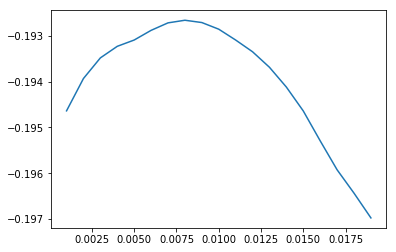

In [135]:
#Hyperparameters tuning
#Lasso
from operator import itemgetter
lr_las=Lasso()
alpha=[]
error=[]
for i in range(1,20):
    alpha.append(i/1000)
    lr_las=Lasso(i/1000)
    error.append(np.mean(cross_val_score(lr_las,X_train,y_train,cv=5,scoring='neg_mean_absolute_error')))
    
plt.plot(alpha,error)
err=tuple(zip(alpha,error))

best_alpha=max(err, key=itemgetter(1))[0]   
las=Lasso(alpha=best_alpha)
las.fit(X_train,y_train)

In [136]:
preds_lr=lr.predict(X_test)
preds_lasso=las.predict(X_test)
preds_rf=gs_rf.best_estimator_.predict(X_test)

In [137]:
scores_lr=mean_absolute_error(preds_lr,y_test)
scores_las=mean_absolute_error(preds_lasso,y_test)
scores_rf=mean_absolute_error(preds_rf,y_test)
scores=pd.DataFrame(index=['Linear_Reg','Lasso','Random_Forest'],data=[scores_lr,scores_las,scores_rf],columns=['scores_tuned']).sort_values('scores_tuned')

In [142]:
scores_lr_pr=(mean_absolute_error(np.exp(preds_lr),np.exp(y_test)))/(np.mean(np.exp(y_test)))
scores_las_pr=(mean_absolute_error(np.exp(preds_lasso),np.exp(y_test)))/(np.mean(np.exp(y_test)))
scores_rf_pr=(mean_absolute_error(np.exp(preds_rf),np.exp(y_test)))/(np.mean(np.exp(y_test)))


0.12881359748307197

In [155]:
scores=pd.DataFrame({'scores':[scores_lr,scores_las,scores_rf],'scores in percentage':[scores_lr_pr,scores_las_pr,scores_rf_pr]}).sort_values('scores',ascending=True)
scores.rename(index={0:'Linear_Reg',1:'Lasso',2:'Random_Forest'})



,scores,scores in percentage
Random_Forest,0.126042,0.128814
Lasso,0.185426,0.181265
Linear_Reg,0.192431,0.185394
